In [1]:
#pip install seaborn

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
(x_train,y_train),(x_test,y_test)= tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 2s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
labels={0:"T-Shirt",1:"Trousers",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"T-Shirt",7:"Sneakers",8:"Bag",9:"Ankle Boot"}

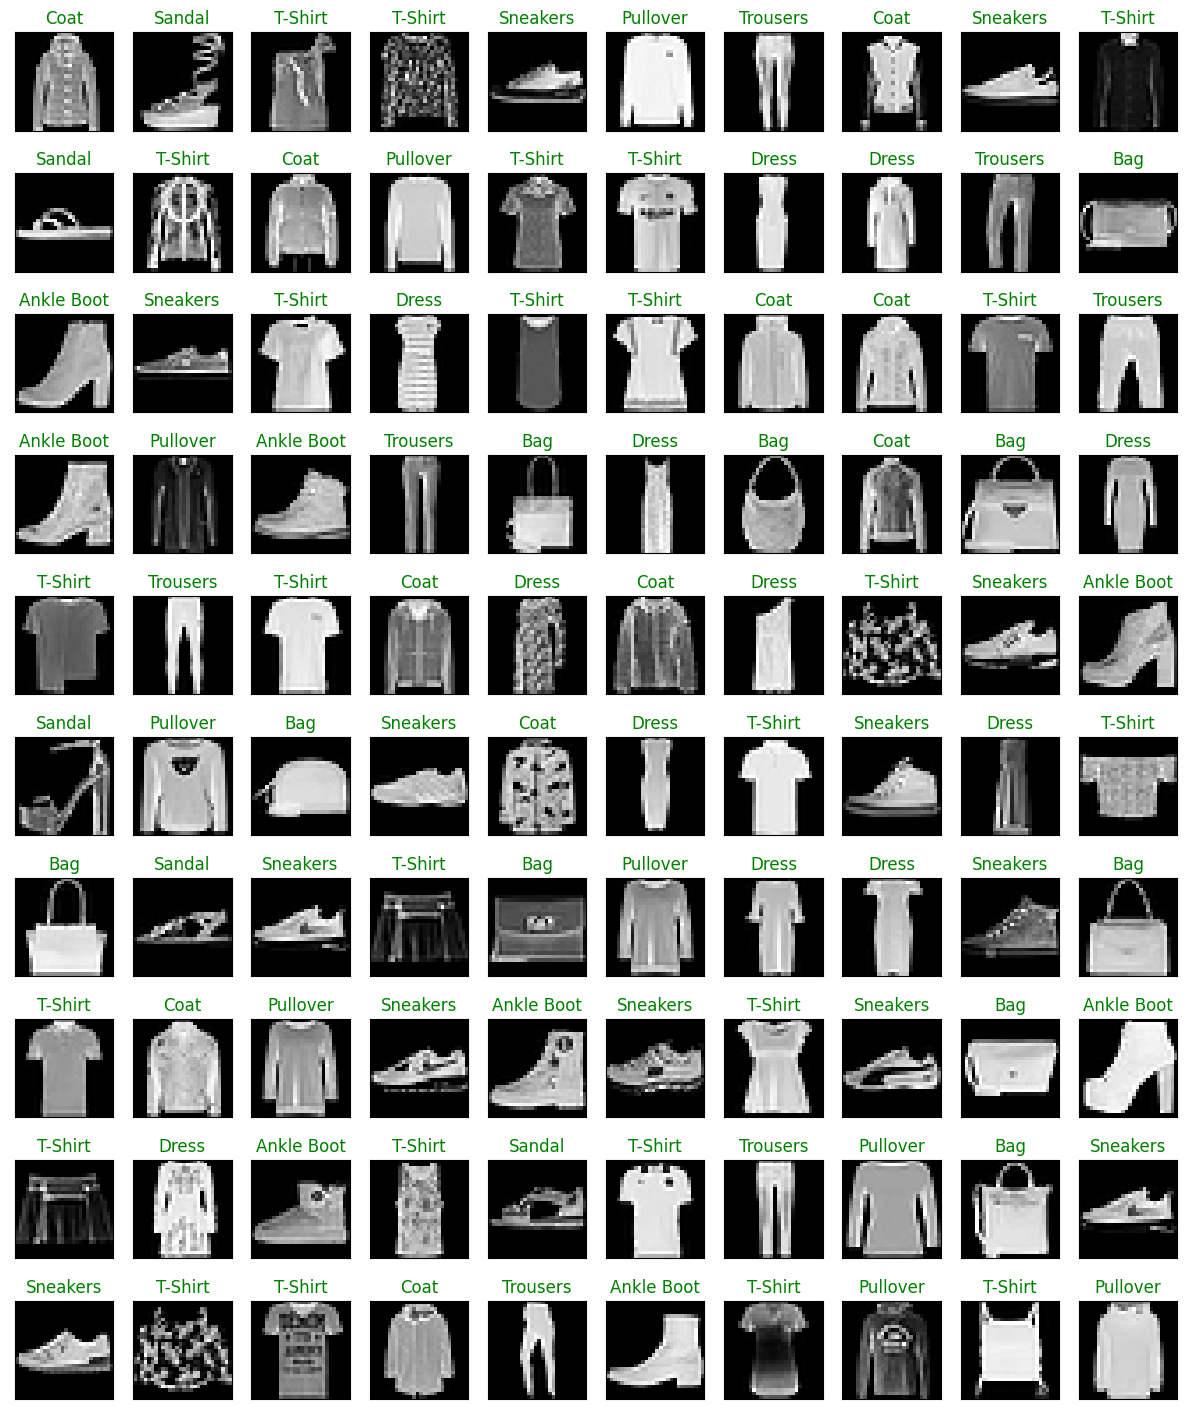

In [5]:
a=np.random.randint(low=0,high=1000,size=100)
fig=plt.figure(figsize=(15,18))
c=1
for i in a:
    fig.add_subplot(10,10,c)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap='gray')
    plt.title(labels[y_train[i]],color="green",fontsize=12)
    c+=1

In [6]:
x_train=x_train/255.
x_test=x_test/255.

In [7]:
noise_factor=0.3
noise_train=[]

for img in x_train:
    noisy_img = img + noise_factor* np.random.randn(*img.shape)
    noisy_img = np.clip(noisy_img , 0, 1)
    noise_train.append(noisy_img)


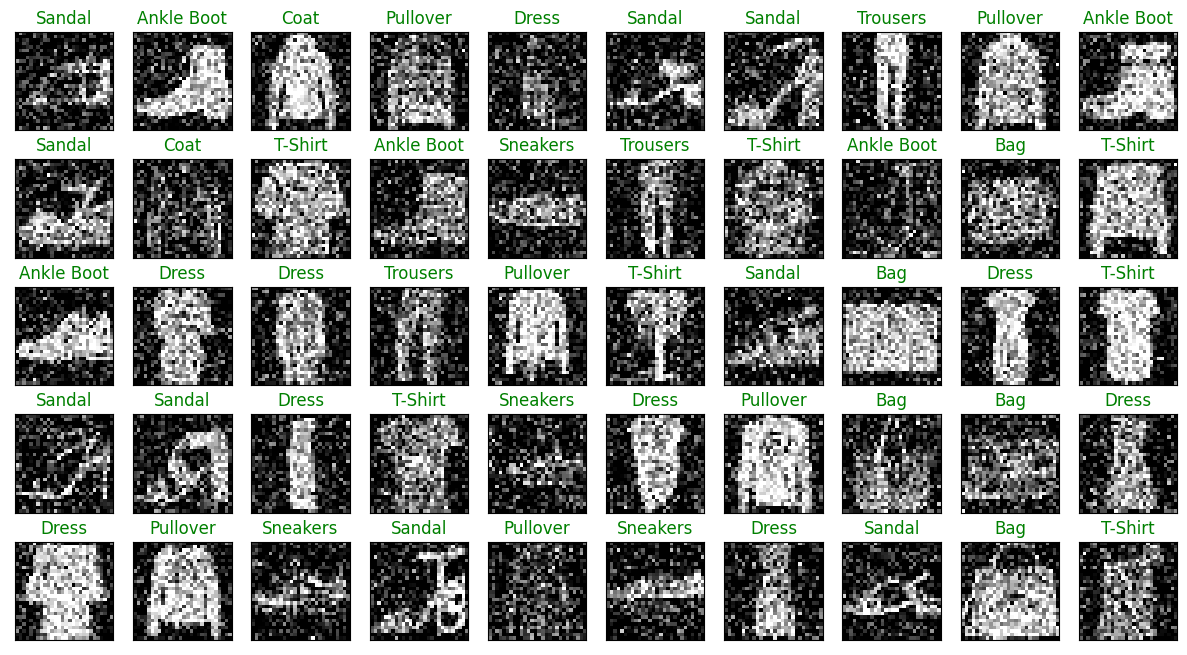

In [8]:
a=np.random.randint(low=0,high=1000,size=50)
fig=plt.figure(figsize=(15,8))
c=1
for i in a:
    fig.add_subplot(5,10,c)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(noise_train[i],cmap='gray')
    plt.title(labels[y_train[i]],color="green",fontsize=12)
    c+=1

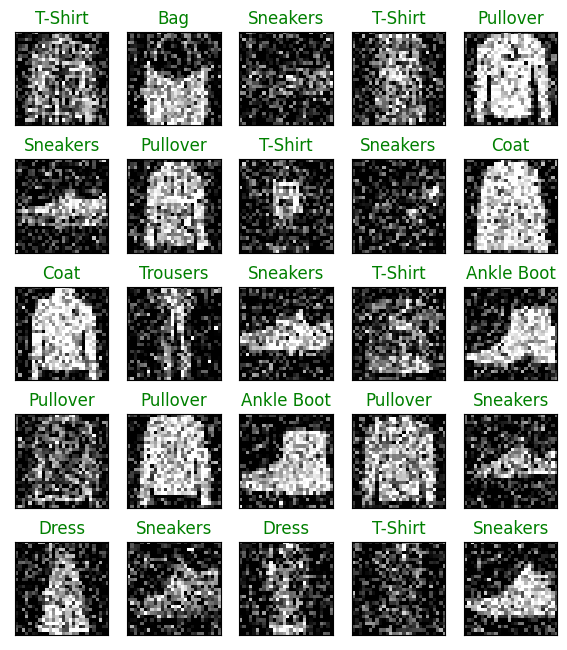

In [9]:
noise_factor=0.3
noise_test=[]

for img in x_test:
    noisy_img = img + noise_factor* np.random.randn(*img.shape)
    noisy_img = np.clip(noisy_img , 0, 1)
    noise_test.append(noisy_img)

a=np.random.randint(low=0,high=1000,size=25)
fig=plt.figure(figsize=(7,8))
c=1
for i in a:
    fig.add_subplot(5,5,c)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(noise_test[i],cmap='gray')
    plt.title(labels[y_test[i]],color="green",fontsize=12)
    c+=1

In [10]:
noise_test=np.array(noise_test)
noise_train=np.array(noise_train)

In [11]:
autoencoder= tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),strides=2,padding='same',input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(16,(3,3),strides=2,padding='same'),
    tf.keras.layers.Conv2D(16,(3,3),strides=1,padding='same'),
    tf.keras.layers.Conv2DTranspose(32,(3,3),strides=2,padding='same'),
    tf.keras.layers.Conv2DTranspose(1,(3,3),strides=2,padding='same',activation='sigmoid'),
])
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 16)          4624      
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       4640      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 1)        289       
 ranspose)                                                       
                                                                 
Total params: 12,193
Trainable params: 12,193
Non-traina

In [12]:
autoencoder.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])

D:\AU\sem2\DL lab\dl_lab\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [13]:
valid_noise=noise_test[:5000,:]
valid_y=x_test[:5000,:]
noise_test = noise_test[5000:,:]
x_test = x_test[5000:,:]
print(valid_noise.shape,valid_y.shape,noise_test.shape,x_test.shape)

(5000, 28, 28) (5000, 28, 28) (5000, 28, 28) (5000, 28, 28)


In [14]:
autoencoder.fit(noise_train.reshape(-1,28,28,1),
               x_train.reshape(-1,28,28,1),
               epochs=15,
               batch_size=64,
               validation_data=(valid_noise.reshape(-1,28,28,1),valid_y.reshape(-1,28,28,1)))

Epoch 1/15
938/938 [==============================] - 16s 17ms/step - loss: 0.3266 - accuracy: 0.5069 - val_loss: 0.3048 - val_accuracy: 0.5066
Epoch 2/15
938/938 [==============================] - 17s 18ms/step - loss: 0.3000 - accuracy: 0.5093 - val_loss: 0.3015 - val_accuracy: 0.5069
Epoch 3/15
938/938 [==============================] - 16s 17ms/step - loss: 0.2983 - accuracy: 0.5094 - val_loss: 0.3004 - val_accuracy: 0.5069
Epoch 4/15
938/938 [==============================] - 16s 17ms/step - loss: 0.2977 - accuracy: 0.5094 - val_loss: 0.2999 - val_accuracy: 0.5070
Epoch 5/15
938/938 [==============================] - 16s 17ms/step - loss: 0.2973 - accuracy: 0.5095 - val_loss: 0.2996 - val_accuracy: 0.5070
Epoch 6/15
938/938 [==============================] - 16s 17ms/step - loss: 0.2970 - accuracy: 0.5095 - val_loss: 0.2996 - val_accuracy: 0.5070
Epoch 7/15
938/938 [==============================] - 16s 17ms/step - loss: 0.2968 - accuracy: 0.5095 - val_loss: 0.2993 - val_accuracy:

In [15]:
metric = autoencoder.evaluate(noise_test.reshape(-1,28,28,1),x_test.reshape(-1,28,28,1))

157/157 [==============================] - 1s 4ms/step - loss: 0.2980 - accuracy: 0.5076


In [16]:
print("Test Accuracy is {:.2f} and loss is {:.3f}".format(metric[1]*100,metric[0]))

Test Accuracy is 50.76 and loss is 0.298


1/1 [==============================] - 0s 16ms/step


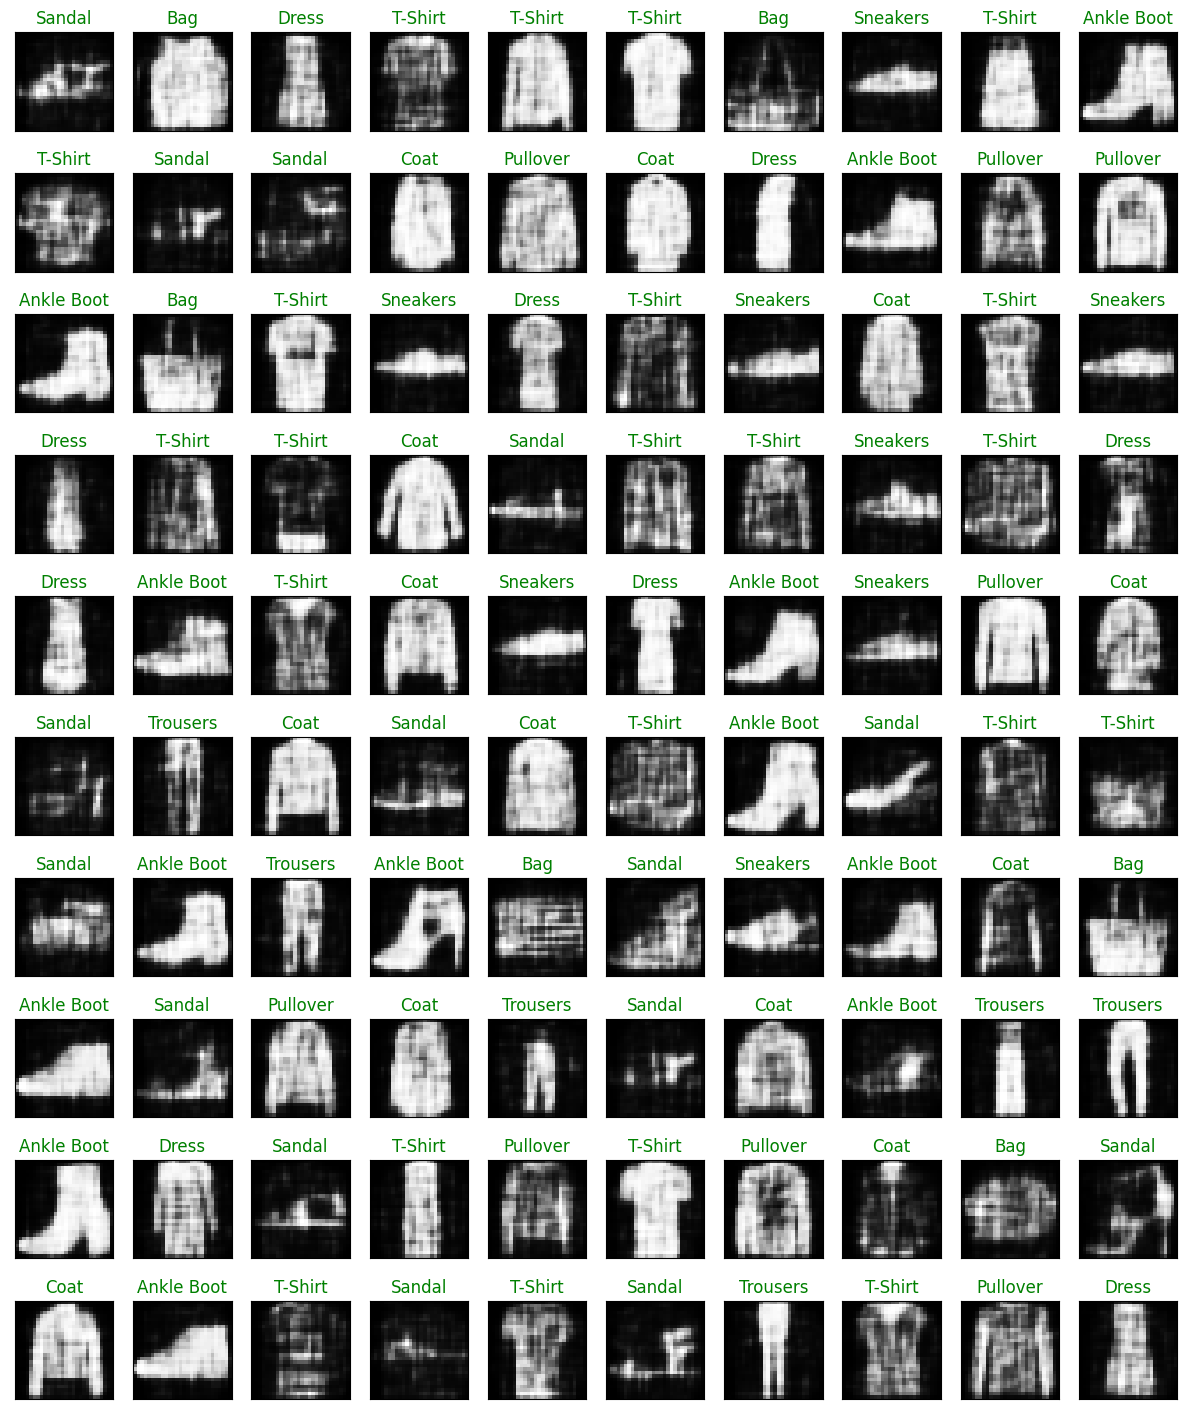

In [17]:
a=np.random.randint(low=0,high=1000,size=100)
fig=plt.figure(figsize=(15,18))
c=1
for i in a:
    pred=autoencoder.predict(noise_test[i].reshape(1,28,28,1))
    fig.add_subplot(10,10,c)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(pred.reshape(28,28),cmap='gray')
    plt.title(labels[y_test[5000:][i]],color="green",fontsize=12)
    c+=1

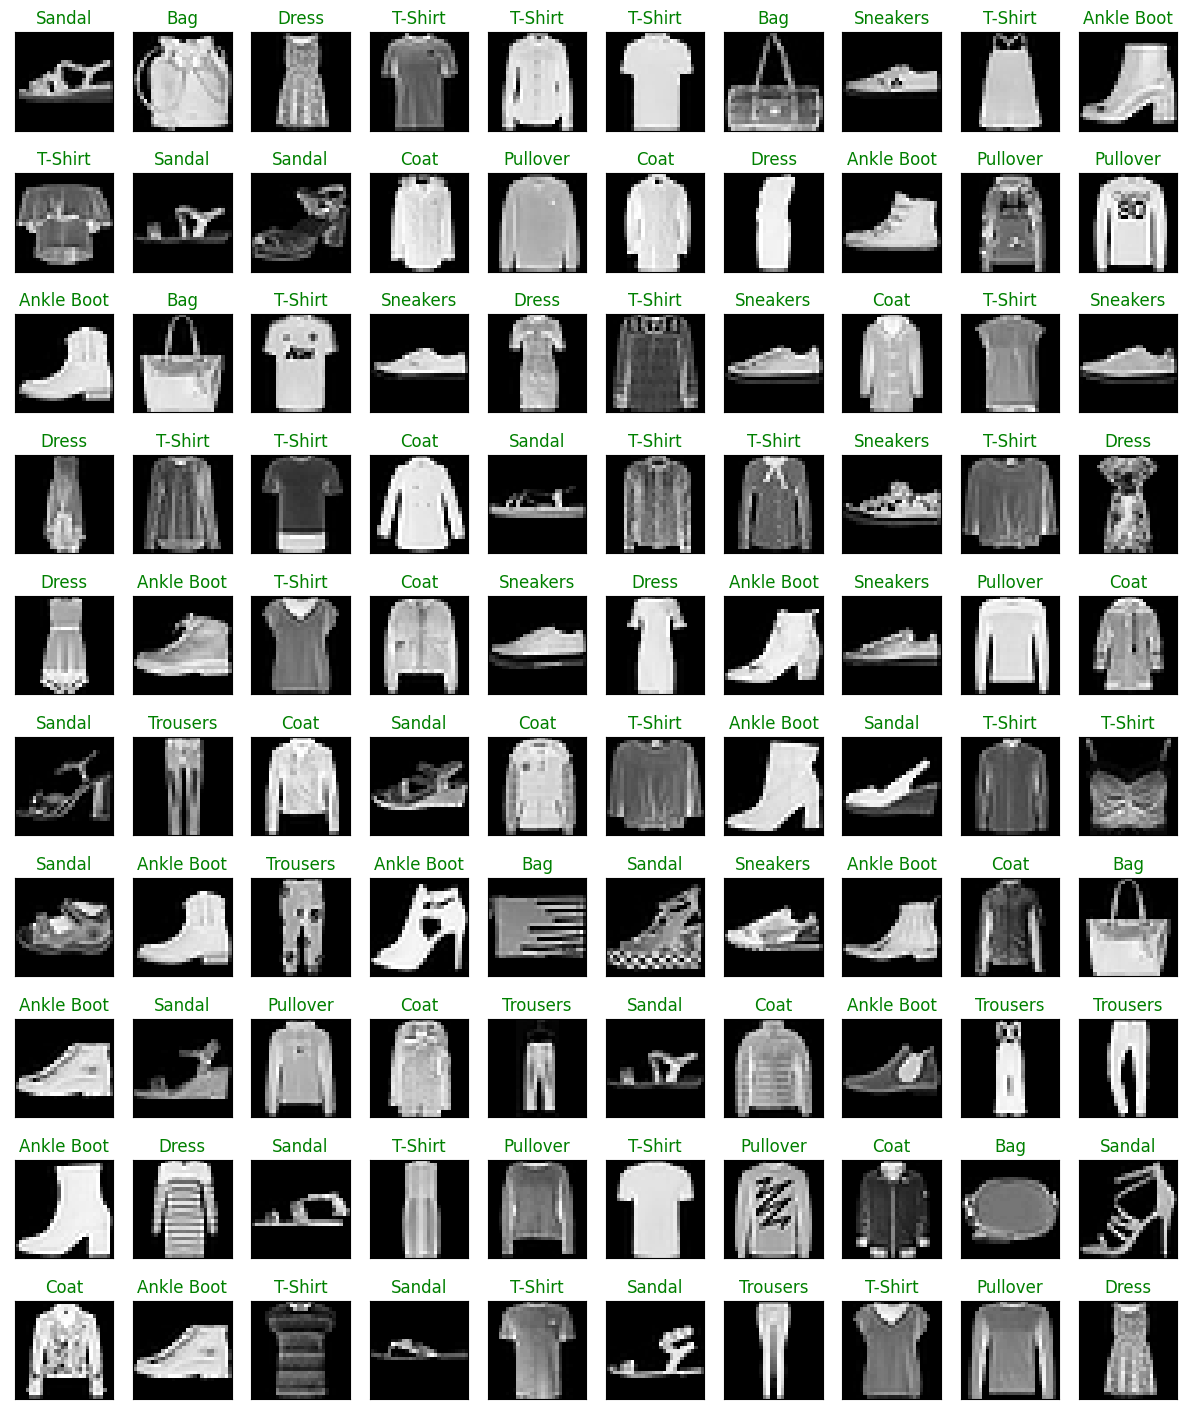

In [18]:
fig=plt.figure(figsize=(15,18))
c=1
for i in a:
    fig.add_subplot(10,10,c)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].reshape(28,28),cmap='gray')
    plt.title(labels[y_test[5000:][i]],color="green",fontsize=12)
    c+=1